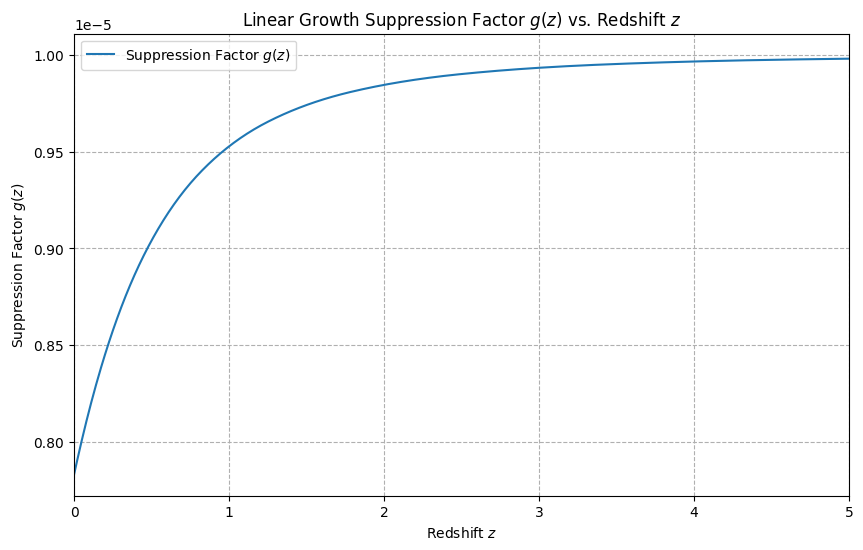

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from astropy.cosmology import Planck15 as cosmo

def omega_DE(a):
    return -1

def Omega_DE(a, Omega_m0, Omega_Lambda0):
    # Total Omega should be 1, so Omega_DE is the remainder of the energy density
    Omega_k = 1 - Omega_m0 - Omega_Lambda0
    return Omega_Lambda0 / (Omega_m0 * a**-3 + Omega_Lambda0 + Omega_k * a**-2)

def growth_ode(y, ln_a, Omega_m0, Omega_Lambda0):
    g, dg_dln_a = y
    a = np.exp(ln_a)
    omega = omega_DE(a)
    Omega_DE_a = Omega_DE(a, Omega_m0, Omega_Lambda0)
    d2g_dln_a2 = -0.5 * (5 - 3 * omega * Omega_DE_a) * dg_dln_a - 1.5 * (1 - omega) * Omega_DE_a * g
    return [dg_dln_a, d2g_dln_a2]

def solve_growth_suppression(Omega_m0, Omega_Lambda0):
    ln_a = np.linspace(-7, 0, 1000)  # ln(a) from very small scale factor (early universe) to 1 (today)
    y0 = [1e-5, 0]  # Initial conditions: small value for g and dg/d(ln(a))
    sol = odeint(growth_ode, y0, ln_a, args=(Omega_m0, Omega_Lambda0))
    g = sol[:, 0]
    return np.exp(ln_a), g

# Fiducial cosmological parameters from Planck 2015
Omega_m0 = cosmo.Om0
Omega_Lambda0 = cosmo.Ode0

# Solve the growth suppression factor
a, g = solve_growth_suppression(Omega_m0, Omega_Lambda0)
z = 1 / a - 1

# Plot g(z) vs z
plt.figure(figsize=(10, 6))
plt.plot(z, g, label='Suppression Factor $g(z)$')
plt.xlabel('Redshift $z$')
plt.ylabel('Suppression Factor $g(z)$')
plt.title('Linear Growth Suppression Factor $g(z)$ vs. Redshift $z$')
plt.legend()
plt.grid(True, which='both', ls='--')
plt.xlim(0,5)
plt.show()
